# Final Project - Analysis of Twitter Data over iPhones and new features

**How data was collected**
Twitter Developer App, connected to Twitter API. Using specific hashtags to extract tweets into a .json file to process for later through Python script.

All relevant hashtags are collected through a single datamine.

#iphonex, #iphone8, #faceid, #touchid, #iphone8plus


**What data is collected**
Tweets containing information such as username, whether or not it was a retweet or not, as well as the language of the user and the geographical location of the user are a few fields. Information is retrieved and stored initially as a JSON file, but converted to a CSV file through this Notebook and restored as a Pandas dataframe.

**What we're trying to solve**

Through twitter data, we're trying to determine the positivity and negativity of features such as FaceID and TouchID on iPhones. We're also trying to solve for particular reasons why someone may dislike or like a phone, as well as the perception of a particular phone. We also believe it is possible to discover technical issues people report about on twitter as well as potential new ideas for the iPhone as well.

**Expected benefits & Potential Clients**

Clients: Apple and potential/current shareholders.

Benefits: Figuring out the reception of each phone, knowing what issues people experience with the phones, and discovering new ideas put forth by consumer base.

This information in hand can help innovation, prescribe issues to be fixed, and figure out how the product fares in the market.

In [1]:
#Does the intial import of data into the notebook.
#CODE TESTED FIRST WITH A JSON FILE OF 1000 TWEETS.
import json
 
with open('data/project_tweets_25k.json', 'r') as f:
    line = f.readline() # read only the first tweet/line
    tweet = json.loads(line) # load it as Python dictionary
    print(json.dumps(tweet, indent=4)) 
    
# The original data from Twitter looks like below.

{
    "quote_count": 0, 
    "contributors": null, 
    "truncated": false, 
    "text": "RT @ScreenBeautiful: \u062e\u0644\u0643\u0645 \u0642\u0631\u064a\u0628\u064a\u0646 \ud83d\ude0e\n\u0627\u0644\u0633\u062d\u0628 \u0639\u0644\u0649 \u0627\u064a\u0641\u0648\u0646 \u0627\u0643\u0633 \u0628\u062a\u0627\u0631\u064a\u062e 1/12/2017\n\n\u0644\u0627 \u062a\u064a\u0623\u0633 \u0648\u0634\u0627\u0631\u0643 \u0644\u0622\u062e\u0631 \u0644\u062d\u0638\u0629 \ud83d\ude3b\ud83d\udcf1\n#\u0627\u064a\u0641\u0648\u0646\u0643_\u0645\u0639_\u0627\u0644\u0634\u0627\u0634\u0629_\u0627\u0644\u062c\u0645\u064a\u0644\u0629\u2026 ", 
    "is_quote_status": false, 
    "in_reply_to_status_id": null, 
    "reply_count": 0, 
    "id": 934591952087060480, 
    "favorite_count": 0, 
    "entities": {
        "user_mentions": [
            {
                "id": 3311197926, 
                "indices": [
                    3, 
                    19
                ], 
                "id_str": "3311197926", 

In [2]:
import json

# create an empty list to store our tweets in
data = []

# append each line of the data to our tweets list using the json module
for line in open('data/project_tweets_25k.json'):
    try:
        data.append(json.loads(line))
    except:
        pass

# lets see how many we got
print len(data)

25000


In [3]:
# read the first five tweets and other meta data only
for i in data[:5]:
    print i

{u'quote_count': 0, u'contributors': None, u'truncated': False, u'text': u'RT @ScreenBeautiful: \u062e\u0644\u0643\u0645 \u0642\u0631\u064a\u0628\u064a\u0646 \U0001f60e\n\u0627\u0644\u0633\u062d\u0628 \u0639\u0644\u0649 \u0627\u064a\u0641\u0648\u0646 \u0627\u0643\u0633 \u0628\u062a\u0627\u0631\u064a\u062e 1/12/2017\n\n\u0644\u0627 \u062a\u064a\u0623\u0633 \u0648\u0634\u0627\u0631\u0643 \u0644\u0622\u062e\u0631 \u0644\u062d\u0638\u0629 \U0001f63b\U0001f4f1\n#\u0627\u064a\u0641\u0648\u0646\u0643_\u0645\u0639_\u0627\u0644\u0634\u0627\u0634\u0629_\u0627\u0644\u062c\u0645\u064a\u0644\u0629\u2026 ', u'is_quote_status': False, u'in_reply_to_status_id': None, u'reply_count': 0, u'id': 934591952087060480L, u'favorite_count': 0, u'entities': {u'user_mentions': [{u'id': 3311197926L, u'indices': [3, 19], u'id_str': u'3311197926', u'screen_name': u'ScreenBeautiful', u'name': u'\u0627\u0644\u0634\u0627\u0634\u0629 \u0627\u0644\u062c\u0645\u064a\u0644\u0629'}], u'symbols': [], u'hashtags': [{u'indice

In [4]:
# read first five tweets only 
for i in data[:5]:
    print i['text']


RT @ScreenBeautiful: خلكم قريبين 😎
السحب على ايفون اكس بتاريخ 1/12/2017

لا تيأس وشارك لآخر لحظة 😻📱
#ايفونك_مع_الشاشة_الجميلة… 
RT @signalbulne: อาจจะไม่ได้เข้ารอบสามคนสุดท้าย แต่มารีญาก็ได้ทำหน้าที่แทนคนไทยทั้งประเทศจนผ่านมาถึงรอบ5คนสุดท้าย เพื่อเป็นการปลอบใจ… 
Grandi soddisfazioni!! Sfidarsi per migliorarsi diventa più facile con l’alleato giusto! #AppleWatchSerie3 #Apple… https://t.co/Q4VGfEakNJ
RT @aljabrfinancing: توقع نتيجة مباراة #الهلال السعودي و #اوراوا الياباني ، واحصل على فرصة الفوز بجهاز #iphone8

الشروط:
١- فولو
٢- ريتو… 
キ変した✨まだ慣れない。。。
#iPhoneX https://t.co/V22uOz8Ms1


In [5]:
# savin the entire tweets (not other data) in a variable and print it

texts = [ T['text'] for T in data if 'text' in T ]
len(texts)

24984

In [6]:
# removing possible error messages
tweets = []
for T in data:
    if 'text' in T:
        tweets.append(T)
len(tweets)

24984

In [7]:
# display screen_name, tweets

for i in tweets[:5]:
    print i['user']['screen_name'], i['text']

nanosha00 RT @ScreenBeautiful: خلكم قريبين 😎
السحب على ايفون اكس بتاريخ 1/12/2017

لا تيأس وشارك لآخر لحظة 😻📱
#ايفونك_مع_الشاشة_الجميلة… 
SiwagonYie RT @signalbulne: อาจจะไม่ได้เข้ารอบสามคนสุดท้าย แต่มารีญาก็ได้ทำหน้าที่แทนคนไทยทั้งประเทศจนผ่านมาถึงรอบ5คนสุดท้าย เพื่อเป็นการปลอบใจ… 
KeepDreamingOut Grandi soddisfazioni!! Sfidarsi per migliorarsi diventa più facile con l’alleato giusto! #AppleWatchSerie3 #Apple… https://t.co/Q4VGfEakNJ
Zqc161 RT @aljabrfinancing: توقع نتيجة مباراة #الهلال السعودي و #اوراوا الياباني ، واحصل على فرصة الفوز بجهاز #iphone8

الشروط:
١- فولو
٢- ريتو… 
chigeyan39 キ変した✨まだ慣れない。。。
#iPhoneX https://t.co/V22uOz8Ms1


In [8]:
# More codes for extracting information from tweets
import csv

ids = [T['id_str'] for T in tweets]
times = [T['created_at'] for T in tweets]
texts = [T['text'] for T in tweets]
screen_names = [T['user']['screen_name'] for T in tweets]
names = [T['user']['name'] for T in tweets]
language = [T['user']['lang'] for T in tweets]
lats = [(T['geo']['coordinates'][0] if T['geo'] else None) for T in tweets]
lons = [(T['geo']['coordinates'][1] if T['geo'] else None) for T in tweets]
place_names = [(T['place']['full_name'] if T['place'] else None) for T in tweets]
place_types = [(T['place']['place_type'] if T['place'] else None) for T in tweets]

# open an output csv file to write to
out = open('data/twits_transform.csv', 'w')

# write the header of our CSV as its first line
out.write('id,created at,text,screen name,name,language,lat,lon,place name,place type\n')

# merge each individual list into a single list using the zip function
rows = zip(ids, times, texts, screen_names, names, language, lats, lons, place_names, place_types)

# use the writer module on our csv file
csv = csv.writer(out)

# use one value from each of our rows list and write it to the csv as a new row
for row in rows:
    values = [(value.encode('utf8') if hasattr(value, 'encode') else value) for value in row]
    csv.writerow(values)

# close our csv file when done
out.close()

In [9]:
#Begin dataframe
import pandas as pd
#First sample uses 'test' data. Later runs will use large dataset I have on my Ubuntu server!
data_df = pd.read_csv('data/twits_transform.csv', error_bad_lines=False)
data_df


,id,created at,text,screen name,name,language,lat,lon,place name,place type
0,934591952087060480,Sun Nov 26 01:17:39 +0000 2017,RT @ScreenBeautiful: خلكم قريبين 😎\r\nالسحب ع...,nanosha00,ننووش,en,NaN,NaN,NaN,NaN
1,934979036354306049,Mon Nov 27 02:55:47 +0000 2017,RT @signalbulne: อาจจะไม่ได้เข้ารอบสามคนสุดท้า...,SiwagonYie,CC🍑,th,NaN,NaN,NaN,NaN
2,934130691704487937,Fri Nov 24 18:44:46 +0000 2017,Grandi soddisfazioni!! Sfidarsi per migliorars...,KeepDreamingOut,•LoveMeOrLeaveMe•,it,NaN,NaN,NaN,NaN
3,934115672266825734,Fri Nov 24 17:45:05 +0000 2017,RT @aljabrfinancing: توقع نتيجة مباراة #الهلال...,Zqc161,Zqc16,ar,NaN,NaN,NaN,NaN
4,934793117890265091,Sun Nov 26 14:37:01 +0000 2017,キ変した✨まだ慣れない。。。\r\n#iPhoneX https://t.co/V22uOz...,chigeyan39,chigeyan,ja,NaN,NaN,NaN,NaN
5,934827520041635841,Sun Nov 26 16:53:43 +0000 2017,RT @workwthecoach: #NewProfilePic i took this ...,Fabio85111039,Fabio,it,NaN,NaN,NaN,NaN
6,934751570549288962,Sun Nov 26 11:51:55 +0000 2017,RT @_poscion: 헐... 그냥 툭 찍었는데 이 결과물 이거 뭐지 ㄷㄷㄷ\r...,It_s_Nothing_,아무것도아님,ko,NaN,NaN,NaN,NaN
7,932856640549814272,Tue Nov 21 06:22:09 +0000 2017,RT @tridderKSA: هاتف #أبل #آيفون_X الجديد 😍\r...,rtss9658,Bّadُriّa 100K,en,NaN,NaN,NaN,NaN
8,934206780783050752,Fri Nov 24 23:47:07 +0000 2017,RT @CSGOFactory: ✴BLACK FRIDAY GIVEAWAY✴\r\n\r...,ryleelaguda,demnrylee,en,NaN,NaN,NaN,NaN
9,935018522857521152,Mon Nov 27 05:32:42 +0000 2017,RT @signalbulne: อาจจะไม่ได้เข้ารอบสามคนสุดท้า...,99bPk,3rdや #Lovelyz1stwin,th,NaN,NaN,NaN,NaN


In [10]:
#Filter out dataframe to include only tweets from an english user (or by another language!)
countries = ['en','en-GB']
english_df = data_df[data_df.language.isin(countries)]
english_df

,id,created at,text,screen name,name,language,lat,lon,place name,place type
0,934591952087060480,Sun Nov 26 01:17:39 +0000 2017,RT @ScreenBeautiful: خلكم قريبين 😎\r\nالسحب ع...,nanosha00,ننووش,en,NaN,NaN,NaN,NaN
7,932856640549814272,Tue Nov 21 06:22:09 +0000 2017,RT @tridderKSA: هاتف #أبل #آيفون_X الجديد 😍\r...,rtss9658,Bّadُriّa 100K,en,NaN,NaN,NaN,NaN
8,934206780783050752,Fri Nov 24 23:47:07 +0000 2017,RT @CSGOFactory: ✴BLACK FRIDAY GIVEAWAY✴\r\n\r...,ryleelaguda,demnrylee,en,NaN,NaN,NaN,NaN
10,933762640446414849,Thu Nov 23 18:22:16 +0000 2017,Ii-fööni näotuvastus läks taskus lahti. https:...,KeberNeet,Küber Neet,en,NaN,NaN,NaN,NaN
12,934141730235981824,Fri Nov 24 19:28:38 +0000 2017,RT @Yayvo_TCS: #WhatThePrice is back with a ba...,floraoliver358,Flora Oliver,en,NaN,NaN,NaN,NaN
13,934748282097516544,Sun Nov 26 11:38:51 +0000 2017,RT @bbinko: พลังแห่งกล้อง #iPhoneX ถ่ายกระรอกห...,spam_pm,🙍🏻‍♀️,en,NaN,NaN,NaN,NaN
14,932955605878345729,Tue Nov 21 12:55:24 +0000 2017,I swear i need tht #iPhoneX ‼️,Todd_Popi,Todd_Popi!!!!!,en,NaN,NaN,NaN,NaN
15,932862179321057280,Tue Nov 21 06:44:09 +0000 2017,RT @ManxomeMia: And then we proceeded to waste...,Youreaclod,Peridot,en,NaN,NaN,NaN,NaN
16,932998564053168131,Tue Nov 21 15:46:06 +0000 2017,#weddingcakerock #royalnationalpark #sydney #i...,luvuhuneko7415,Luvuhuneko,en,NaN,NaN,NaN,NaN
17,934519965046022149,Sat Nov 25 20:31:36 +0000 2017,RT @aye_pollo: Inlove with my new #IphoneX 📱@...,Ryder_1969,❌⭕,en,NaN,NaN,NaN,NaN


In [11]:
#Need numpy and regular expressions for getting the hashtags I need here...
import re
import numpy as np

#Adds a column with the specified hashtags according to a hash list
hash_list = ['#iphonex', '#iphone8', '#faceid', '#touchid', '#iphone8plus']

#To do better matching, we extract the hashtags we want from the text and append it to our data source table.
english_df['Hashtag'] = english_df.text.str.extract('({})'.format('|'.join(hash_list)), flags=re.IGNORECASE, expand=False).fillna('')
english_df['Hashtag'].replace('', np.nan, inplace=True)
english_df

C:\Users\Eric\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\Eric\Anaconda2\lib\site-packages\pandas\core\generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,id,created at,text,screen name,name,language,lat,lon,place name,place type,Hashtag
0,934591952087060480,Sun Nov 26 01:17:39 +0000 2017,RT @ScreenBeautiful: خلكم قريبين 😎\r\nالسحب ع...,nanosha00,ننووش,en,NaN,NaN,NaN,NaN,NaN
7,932856640549814272,Tue Nov 21 06:22:09 +0000 2017,RT @tridderKSA: هاتف #أبل #آيفون_X الجديد 😍\r...,rtss9658,Bّadُriّa 100K,en,NaN,NaN,NaN,NaN,#iPhoneX
8,934206780783050752,Fri Nov 24 23:47:07 +0000 2017,RT @CSGOFactory: ✴BLACK FRIDAY GIVEAWAY✴\r\n\r...,ryleelaguda,demnrylee,en,NaN,NaN,NaN,NaN,NaN
10,933762640446414849,Thu Nov 23 18:22:16 +0000 2017,Ii-fööni näotuvastus läks taskus lahti. https:...,KeberNeet,Küber Neet,en,NaN,NaN,NaN,NaN,NaN
12,934141730235981824,Fri Nov 24 19:28:38 +0000 2017,RT @Yayvo_TCS: #WhatThePrice is back with a ba...,floraoliver358,Flora Oliver,en,NaN,NaN,NaN,NaN,#iPhoneX
13,934748282097516544,Sun Nov 26 11:38:51 +0000 2017,RT @bbinko: พลังแห่งกล้อง #iPhoneX ถ่ายกระรอกห...,spam_pm,🙍🏻‍♀️,en,NaN,NaN,NaN,NaN,#iPhoneX
14,932955605878345729,Tue Nov 21 12:55:24 +0000 2017,I swear i need tht #iPhoneX ‼️,Todd_Popi,Todd_Popi!!!!!,en,NaN,NaN,NaN,NaN,#iPhoneX
15,932862179321057280,Tue Nov 21 06:44:09 +0000 2017,RT @ManxomeMia: And then we proceeded to waste...,Youreaclod,Peridot,en,NaN,NaN,NaN,NaN,#iphonex
16,932998564053168131,Tue Nov 21 15:46:06 +0000 2017,#weddingcakerock #royalnationalpark #sydney #i...,luvuhuneko7415,Luvuhuneko,en,NaN,NaN,NaN,NaN,#iphonex
17,934519965046022149,Sat Nov 25 20:31:36 +0000 2017,RT @aye_pollo: Inlove with my new #IphoneX 📱@...,Ryder_1969,❌⭕,en,NaN,NaN,NaN,NaN,#IphoneX


In [12]:
#Sets back the # symbol in front of hashtags lowered.
english_df['Hashtag_lower'] = english_df['Hashtag'].str.lower()
english_df['Hashtag_lower'] = '#' + english_df['Hashtag_lower'].astype(str)
english_df

C:\Users\Eric\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Eric\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,created at,text,screen name,name,language,lat,lon,place name,place type,Hashtag,Hashtag_lower
0,934591952087060480,Sun Nov 26 01:17:39 +0000 2017,RT @ScreenBeautiful: خلكم قريبين 😎\r\nالسحب ع...,nanosha00,ننووش,en,NaN,NaN,NaN,NaN,NaN,#nan
7,932856640549814272,Tue Nov 21 06:22:09 +0000 2017,RT @tridderKSA: هاتف #أبل #آيفون_X الجديد 😍\r...,rtss9658,Bّadُriّa 100K,en,NaN,NaN,NaN,NaN,#iPhoneX,##iphonex
8,934206780783050752,Fri Nov 24 23:47:07 +0000 2017,RT @CSGOFactory: ✴BLACK FRIDAY GIVEAWAY✴\r\n\r...,ryleelaguda,demnrylee,en,NaN,NaN,NaN,NaN,NaN,#nan
10,933762640446414849,Thu Nov 23 18:22:16 +0000 2017,Ii-fööni näotuvastus läks taskus lahti. https:...,KeberNeet,Küber Neet,en,NaN,NaN,NaN,NaN,NaN,#nan
12,934141730235981824,Fri Nov 24 19:28:38 +0000 2017,RT @Yayvo_TCS: #WhatThePrice is back with a ba...,floraoliver358,Flora Oliver,en,NaN,NaN,NaN,NaN,#iPhoneX,##iphonex
13,934748282097516544,Sun Nov 26 11:38:51 +0000 2017,RT @bbinko: พลังแห่งกล้อง #iPhoneX ถ่ายกระรอกห...,spam_pm,🙍🏻‍♀️,en,NaN,NaN,NaN,NaN,#iPhoneX,##iphonex
14,932955605878345729,Tue Nov 21 12:55:24 +0000 2017,I swear i need tht #iPhoneX ‼️,Todd_Popi,Todd_Popi!!!!!,en,NaN,NaN,NaN,NaN,#iPhoneX,##iphonex
15,932862179321057280,Tue Nov 21 06:44:09 +0000 2017,RT @ManxomeMia: And then we proceeded to waste...,Youreaclod,Peridot,en,NaN,NaN,NaN,NaN,#iphonex,##iphonex
16,932998564053168131,Tue Nov 21 15:46:06 +0000 2017,#weddingcakerock #royalnationalpark #sydney #i...,luvuhuneko7415,Luvuhuneko,en,NaN,NaN,NaN,NaN,#iphonex,##iphonex
17,934519965046022149,Sat Nov 25 20:31:36 +0000 2017,RT @aye_pollo: Inlove with my new #IphoneX 📱@...,Ryder_1969,❌⭕,en,NaN,NaN,NaN,NaN,#IphoneX,##iphonex


In [13]:
#eliminates the first excess pound sign in front of the lowercase hashtag column
english_df['Hashtag_lower'] = english_df['Hashtag_lower'].str[1:]
english_df

C:\Users\Eric\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,created at,text,screen name,name,language,lat,lon,place name,place type,Hashtag,Hashtag_lower
0,934591952087060480,Sun Nov 26 01:17:39 +0000 2017,RT @ScreenBeautiful: خلكم قريبين 😎\r\nالسحب ع...,nanosha00,ننووش,en,NaN,NaN,NaN,NaN,NaN,nan
7,932856640549814272,Tue Nov 21 06:22:09 +0000 2017,RT @tridderKSA: هاتف #أبل #آيفون_X الجديد 😍\r...,rtss9658,Bّadُriّa 100K,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex
8,934206780783050752,Fri Nov 24 23:47:07 +0000 2017,RT @CSGOFactory: ✴BLACK FRIDAY GIVEAWAY✴\r\n\r...,ryleelaguda,demnrylee,en,NaN,NaN,NaN,NaN,NaN,nan
10,933762640446414849,Thu Nov 23 18:22:16 +0000 2017,Ii-fööni näotuvastus läks taskus lahti. https:...,KeberNeet,Küber Neet,en,NaN,NaN,NaN,NaN,NaN,nan
12,934141730235981824,Fri Nov 24 19:28:38 +0000 2017,RT @Yayvo_TCS: #WhatThePrice is back with a ba...,floraoliver358,Flora Oliver,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex
13,934748282097516544,Sun Nov 26 11:38:51 +0000 2017,RT @bbinko: พลังแห่งกล้อง #iPhoneX ถ่ายกระรอกห...,spam_pm,🙍🏻‍♀️,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex
14,932955605878345729,Tue Nov 21 12:55:24 +0000 2017,I swear i need tht #iPhoneX ‼️,Todd_Popi,Todd_Popi!!!!!,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex
15,932862179321057280,Tue Nov 21 06:44:09 +0000 2017,RT @ManxomeMia: And then we proceeded to waste...,Youreaclod,Peridot,en,NaN,NaN,NaN,NaN,#iphonex,#iphonex
16,932998564053168131,Tue Nov 21 15:46:06 +0000 2017,#weddingcakerock #royalnationalpark #sydney #i...,luvuhuneko7415,Luvuhuneko,en,NaN,NaN,NaN,NaN,#iphonex,#iphonex
17,934519965046022149,Sat Nov 25 20:31:36 +0000 2017,RT @aye_pollo: Inlove with my new #IphoneX 📱@...,Ryder_1969,❌⭕,en,NaN,NaN,NaN,NaN,#IphoneX,#iphonex


In [14]:
#Size of dataset with just english tweets
len(english_df)

10711

### Finding hashtags in list

In [15]:
#displays data types for each column in dataframe
english_df.dtypes

id                 int64
created at        object
text              object
screen name       object
name              object
language          object
lat              float64
lon              float64
place name        object
place type        object
Hashtag           object
Hashtag_lower     object
dtype: object

In [16]:
# first extract all hashtags from tweets
hashtags = []

# list one hashtag in a row and save them
for tweet in english_df['text']:
    a = re.findall(r"(?<=#)\w+", tweet)
    for i in a:
        hashtags.append(['#'+i.lower()])

In [17]:
#Sets hashtags to a flattened list.
hashtags = [h[0] for h in hashtags]

In [18]:
#Displays the list
hashtags

['#iphonex',
 '#appleevent',
 '#whattheprice',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#animojikaraoke',
 '#iphonex',
 '#queen',
 '#bohemianrapsody',
 '#carriedaway',
 '#weddingcakerock',
 '#royalnationalpark',
 '#sydney',
 '#ilovesydney',
 '#australia',
 '#visitnsw',
 '#iphonex',
 '#iphonephotog',
 '#iphonex',
 '#win',
 '#giveaway',
 '#competition',
 '#iphonex',
 '#free',
 '#giveaway',
 '#contest',
 '#win',
 '#iphonex',
 '#iphone8',
 '#follow',
 '#retweet',
 '#iphonex',
 '#crypto',
 '#blockchain',
 '#iphonex',
 '#thanksgiving',
 '#turkey',
 '#iphonex',
 '#whattheprice',
 '#iphonex',
 '#iphonex',
 '#uae',
 '#dubai',
 '#iphonex',
 '#newprofilepic',
 '#nofilter',
 '#apple',
 '#iphonex',
 '#blackfriday',
 '#cybermonday',
 '#sale',
 '#pig',
 '#cat',
 '#paws',
 '#iphonex',
 '#iphone8',
 '#iphone8plus',
 '#iphone7',
 '#photos',
 '#iphone',
 '#ipad',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#shotoniphone',
 '#iphonex',
 '#beachdays',
 '#sunrays',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#tha

In [19]:
#Shows List (first 15 items)
for i in hashtags[:15]:
    print i

#iphonex
#appleevent
#whattheprice
#iphonex
#iphonex
#iphonex
#animojikaraoke
#iphonex
#queen
#bohemianrapsody
#carriedaway
#weddingcakerock
#royalnationalpark
#sydney
#ilovesydney


In [20]:
#Creating two lists. First, a list with just iphone type.
iphone_list = ['#iphonex','#iphone8','#iphone8plus', "#iphone", "iphone7", "iphone7plus"]
phone_type_list = [x for x in hashtags if x in iphone_list]
phone_type_list

['#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphone8',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphone8',
 '#iphone8plus',
 '#iphone',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphone8plus',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphone8',
 '#iphonex',
 '#iphonex',
 '#iphone8',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphone',
 '#iphone8',
 '#iphonex',
 '#iphonex',
 '#iphone8',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphone8plus',
 '#iphone8',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphone',
 '#iphonex',
 '#iphonex',
 '#iphone8',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphone8',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#iphonex',
 '#

In [21]:
from collections import Counter
# count number of times hashtags appears in list
phone_count = Counter(phone_type_list)
phone_count

Counter({'#iphone': 469,
         '#iphone8': 984,
         '#iphone8plus': 223,
         '#iphonex': 7495})

In [22]:
# convert dict to dataframe for easy visualization
phone_count_df = pd.DataFrame.from_dict(phone_count, orient='index', dtype=None)
phone_count_df

,0
#iphone8plus,223
#iphone8,984
#iphone,469
#iphonex,7495


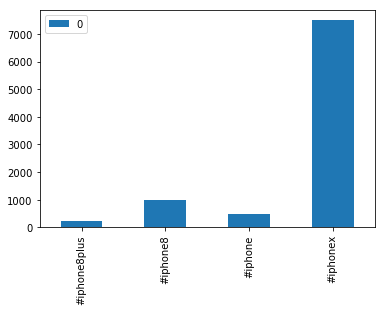

In [23]:
#Displays bar chart of the count of each type of hashtag
import matplotlib.pyplot as plot
%matplotlib inline
phone_count_df.plot(kind='bar')

In [24]:
# check unique values by converting to set
phone_set = set(phone_type_list)
phone_set

{'#iphone', '#iphone8', '#iphone8plus', '#iphonex'}

In [25]:
#Second list includes number of mentions of faceid or touchid hashtags

In [26]:
# list of authentication hashtags
auth_list = ['#faceid','#touchid']
auth_type_list = [x for x in hashtags if x in auth_list]
auth_type_list

['#faceid',
 '#faceid',
 '#touchid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#touchid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#touchid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#touchid',
 '#touchid',
 '#faceid',
 '#faceid',
 '#touchid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#touchid',
 '#faceid',
 '#touchid',
 '#touchid',
 '#touchid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#touchid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#touchid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#touchid',
 '#faceid',
 '#touchid',
 '#faceid',
 '#faceid',
 '#faceid',
 '#touchid',
 '#touchid',
 '#faceid',


In [27]:
# count number of times hashtags appears in list
feature_count = Counter(auth_type_list)
feature_count

Counter({'#faceid': 80, '#touchid': 20})

In [28]:
# check unique values by converting to set
auth_set = set(auth_type_list)
auth_set

{'#faceid', '#touchid'}

In [29]:
# convert dict to dataframe for easy visualization
feature_count_df = pd.DataFrame.from_dict(feature_count, orient='index', dtype=None)
feature_count_df

,0
#faceid,80
#touchid,20


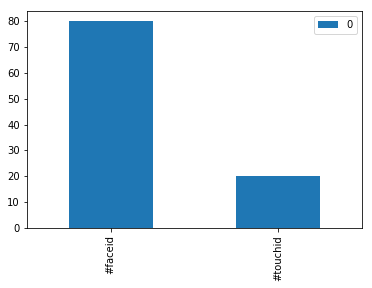

In [30]:
#plots the hashtags for faceid and touch id
feature_count_df.plot(kind='bar')

# Content Analytics

In [31]:
#puts tweet text in list, using the tweet text stored in the dataframe
pre_tweets = []

for tweet in english_df['text']:
        pre_tweets.append(tweet)

len(pre_tweets)

10711

In [32]:
### clean up the texts
import enchant
enc = enchant.Dict("en_US")
# array for clean text
clean_tweets = []
# words from tweets about competitions

# loop through texts
for i in pre_tweets:
    
    # remove urls
    result=re.sub(r"http\S+", "", i)
    # remove user names
    result = re.sub(r"(@[A-Za-z0-9]+)", "", i)
    # remove random chars
    result = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", i)
    # a little more...
    result = ' '.join(re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", i).split())
   
    # remove non-english words
    for word in i.split():
        if (enc.check(word)):
            result += " " + word
    # add to list
    clean_tweets.append(result)
clean_tweets

['RT 1122017 RT',
 'RT X iPhoneX AppleEvent RT',
 'RT BLACK FRIDAY GIVEAWAYIPHONE X GIVEAWAY Retweet this Add on snapchat goodvibes686 Goodlu RT FRIDAY X GIVEAWAY this Add on',
 'Iifni notuvastus lks taskus lahti',
 "RT TCS WhatThePrice is back with a bang Each RT drops the price of iPhoneX by Rs 50 Isnt that amazing Hit the R RT is back with a Each RT drops the price of by Rs. Isn't that Hit the",
 'RT iPhoneX RT',
 'I swear i need tht iPhoneX I swear i need',
 'RT And then we proceeded to waste half our day animojikaraoke iphonex queen bohemianrapsody carriedaway RT And then we proceeded to waste half our day.',
 'weddingcakerock royalnationalpark sydney ilovesydney australia visitnsw iphonex iphonephotog',
 'RT pollo Inlove with my new IphoneX RT with my new',
 'RT FOLLOW amp RETWEET TO WIN THIS iPhone X 256GB GIVEAWAY Ends 241117 COMPETITION iPhoneX RT FOLLOW TO THIS',
 'RT 17 FREE GIVEAWAY Contest FINALLY WIN iPhoneX iPhone8 JUST FOLLOW ME amp RETWEET TO WINLastly Get one here RT 

In [33]:
len(clean_tweets)

10711

In [34]:
#attach list of cleaned tweets to english dataframe
#Prepares a column in dataframe for TextBlob sentiment analysis
english_df['clean_tweets'] = pd.Series(clean_tweets, index=english_df.index)
english_df

/Users/achauncey/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,created at,text,screen name,name,language,lat,lon,place name,place type,Hashtag,Hashtag_lower,clean_tweets
0,934591952087060480,Sun Nov 26 01:17:39 +0000 2017,RT @ScreenBeautiful: خلكم قريبين 😎\nالسحب على...,nanosha00,ننووش,en,NaN,NaN,NaN,NaN,NaN,nan,RT 1122017 RT
7,932856640549814272,Tue Nov 21 06:22:09 +0000 2017,RT @tridderKSA: هاتف #أبل #آيفون_X الجديد 😍\n...,rtss9658,Bّadُriّa 100K,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,RT X iPhoneX AppleEvent RT
8,934206780783050752,Fri Nov 24 23:47:07 +0000 2017,RT @CSGOFactory: ✴BLACK FRIDAY GIVEAWAY✴\n\n🔸...,ryleelaguda,demnrylee,en,NaN,NaN,NaN,NaN,NaN,nan,RT BLACK FRIDAY GIVEAWAYIPHONE X GIVEAWAY Retw...
10,933762640446414849,Thu Nov 23 18:22:16 +0000 2017,Ii-fööni näotuvastus läks taskus lahti. https:...,KeberNeet,Küber Neet,en,NaN,NaN,NaN,NaN,NaN,nan,Iifni notuvastus lks taskus lahti
12,934141730235981824,Fri Nov 24 19:28:38 +0000 2017,RT @Yayvo_TCS: #WhatThePrice is back with a ba...,floraoliver358,Flora Oliver,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,RT TCS WhatThePrice is back with a bang Each R...
13,934748282097516544,Sun Nov 26 11:38:51 +0000 2017,RT @bbinko: พลังแห่งกล้อง #iPhoneX ถ่ายกระรอกห...,spam_pm,🙍🏻‍♀️,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,RT iPhoneX RT
14,932955605878345729,Tue Nov 21 12:55:24 +0000 2017,I swear i need tht #iPhoneX ‼️,Todd_Popi,Todd_Popi!!!!!,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,I swear i need tht iPhoneX I swear i need
15,932862179321057280,Tue Nov 21 06:44:09 +0000 2017,RT @ManxomeMia: And then we proceeded to waste...,Youreaclod,Peridot,en,NaN,NaN,NaN,NaN,#iphonex,#iphonex,RT And then we proceeded to waste half our day...
16,932998564053168131,Tue Nov 21 15:46:06 +0000 2017,#weddingcakerock #royalnationalpark #sydney #i...,luvuhuneko7415,Luvuhuneko,en,NaN,NaN,NaN,NaN,#iphonex,#iphonex,weddingcakerock royalnationalpark sydney ilove...
17,934519965046022149,Sat Nov 25 20:31:36 +0000 2017,RT @aye_pollo: Inlove with my new #IphoneX 📱@...,Ryder_1969,❌⭕,en,NaN,NaN,NaN,NaN,#IphoneX,#iphonex,RT pollo Inlove with my new IphoneX RT with my...


In [35]:
drop_words = ['free', 'giveaway', 'give away', 'win', 'competition']
        
english_df2 = english_df[~english_df['text'].isin(drop_words)]  

english_df2

,id,created at,text,screen name,name,language,lat,lon,place name,place type,Hashtag,Hashtag_lower,clean_tweets
0,934591952087060480,Sun Nov 26 01:17:39 +0000 2017,RT @ScreenBeautiful: خلكم قريبين 😎\nالسحب على...,nanosha00,ننووش,en,NaN,NaN,NaN,NaN,NaN,nan,RT 1122017 RT
7,932856640549814272,Tue Nov 21 06:22:09 +0000 2017,RT @tridderKSA: هاتف #أبل #آيفون_X الجديد 😍\n...,rtss9658,Bّadُriّa 100K,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,RT X iPhoneX AppleEvent RT
8,934206780783050752,Fri Nov 24 23:47:07 +0000 2017,RT @CSGOFactory: ✴BLACK FRIDAY GIVEAWAY✴\n\n🔸...,ryleelaguda,demnrylee,en,NaN,NaN,NaN,NaN,NaN,nan,RT BLACK FRIDAY GIVEAWAYIPHONE X GIVEAWAY Retw...
10,933762640446414849,Thu Nov 23 18:22:16 +0000 2017,Ii-fööni näotuvastus läks taskus lahti. https:...,KeberNeet,Küber Neet,en,NaN,NaN,NaN,NaN,NaN,nan,Iifni notuvastus lks taskus lahti
12,934141730235981824,Fri Nov 24 19:28:38 +0000 2017,RT @Yayvo_TCS: #WhatThePrice is back with a ba...,floraoliver358,Flora Oliver,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,RT TCS WhatThePrice is back with a bang Each R...
13,934748282097516544,Sun Nov 26 11:38:51 +0000 2017,RT @bbinko: พลังแห่งกล้อง #iPhoneX ถ่ายกระรอกห...,spam_pm,🙍🏻‍♀️,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,RT iPhoneX RT
14,932955605878345729,Tue Nov 21 12:55:24 +0000 2017,I swear i need tht #iPhoneX ‼️,Todd_Popi,Todd_Popi!!!!!,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,I swear i need tht iPhoneX I swear i need
15,932862179321057280,Tue Nov 21 06:44:09 +0000 2017,RT @ManxomeMia: And then we proceeded to waste...,Youreaclod,Peridot,en,NaN,NaN,NaN,NaN,#iphonex,#iphonex,RT And then we proceeded to waste half our day...
16,932998564053168131,Tue Nov 21 15:46:06 +0000 2017,#weddingcakerock #royalnationalpark #sydney #i...,luvuhuneko7415,Luvuhuneko,en,NaN,NaN,NaN,NaN,#iphonex,#iphonex,weddingcakerock royalnationalpark sydney ilove...
17,934519965046022149,Sat Nov 25 20:31:36 +0000 2017,RT @aye_pollo: Inlove with my new #IphoneX 📱@...,Ryder_1969,❌⭕,en,NaN,NaN,NaN,NaN,#IphoneX,#iphonex,RT pollo Inlove with my new IphoneX RT with my...


# iPhone 8, 8 Plus, X

In [36]:
# start with list of clean tweets. all we need is text for this part..
clean_tweets

['RT 1122017 RT',
 'RT X iPhoneX AppleEvent RT',
 'RT BLACK FRIDAY GIVEAWAYIPHONE X GIVEAWAY Retweet this Add on snapchat goodvibes686 Goodlu RT FRIDAY X GIVEAWAY this Add on',
 'Iifni notuvastus lks taskus lahti',
 "RT TCS WhatThePrice is back with a bang Each RT drops the price of iPhoneX by Rs 50 Isnt that amazing Hit the R RT is back with a Each RT drops the price of by Rs. Isn't that Hit the",
 'RT iPhoneX RT',
 'I swear i need tht iPhoneX I swear i need',
 'RT And then we proceeded to waste half our day animojikaraoke iphonex queen bohemianrapsody carriedaway RT And then we proceeded to waste half our day.',
 'weddingcakerock royalnationalpark sydney ilovesydney australia visitnsw iphonex iphonephotog',
 'RT pollo Inlove with my new IphoneX RT with my new',
 'RT FOLLOW amp RETWEET TO WIN THIS iPhone X 256GB GIVEAWAY Ends 241117 COMPETITION iPhoneX RT FOLLOW TO THIS',
 'RT 17 FREE GIVEAWAY Contest FINALLY WIN iPhoneX iPhone8 JUST FOLLOW ME amp RETWEET TO WINLastly Get one here RT 

In [54]:
from nltk.corpus import stopwords
# stopwords object -> cache object to make loop faster
cachedStopWords = stopwords.words("english")

# remove tweets about random giveaways and competitions
drop_words = ['win', 'giveaway','prize','competition', 'available','each rt', 'prize', 'rt']
# create an array for the new tweets
new_tweets = []
# loop through the entire set of tweets
for k in clean_tweets:
    # set var l = current tweets
    l=k.lower()
    l=' '.join([word for word in l.split() if word not in cachedStopWords])

    # loop through stop words
    for d_ in drop_words:
        # check if word is in sentence
        if d_ in k.lower():
            l = ''
    # check if len > 1
    if (len(l) > 1):
        new_tweets.append(l)

/Users/achauncey/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:13: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  del sys.path[0]


In [55]:
new_tweets

['iifni notuvastus lks taskus lahti',
 'swear need tht iphonex swear need',
 'weddingcakerock royalnationalpark sydney ilovesydney australia visitnsw iphonex iphonephotog',
 'happy thanksgiving us iphone repair 4 less thanksgiving turkey iphonex happy thanksgiving us repair 4',
 'blackfriday cybermonday salepig cat paws iphonex iphone8 iphone8plus iphone7',
 'need transfer photos iphone ipad iphonex let gihosoft mobile transfer help need transfer let mobile transfer help',
 'rightly said rightly',
 'work iphonex bake iphonex babysit iphonex work bake babysit',
 'thats thanksgiving2017 cambpics iphonex thankful',
 'trying camera new iphone8plus trying camera new',
 "order youll probably get new iphonex next week bgr order you'll probably get new next week",
 'foxconn shipping half million iphonex units day shipping half million units day',
 'iphonex amazinggggg',
 'save 25 plus free shipping week use code snowproof check phoozy save plus free shipping use check out.',
 'purchase unlocke

In [56]:
# tweets about iphone 8

# list comprehension
iphone_8_plus = [s for s in new_tweets if any(stop in s for stop in {'iphone8 plus', 'iphone 8 plus', 'iphone 8plus', 'iphone8plus'})]

# print list
iphone_8_plus

['blackfriday cybermonday salepig cat paws iphonex iphone8 iphone8plus iphone7',
 'trying camera new iphone8plus trying camera new',
 'got privilege engage visually icon themanwiththeredbag iphone8plus 10yearsofiphone got privilege engage visually icon',
 'chinese lantern bling swarovski crystal iphone 8 iphone 8 plus case iphone8 iphonex blingbling click chinese lantern crystal 8 8 plus case click',
 'iphonewpscen sunflower yellow iphone8plus wallpaper sunflower yellow',
 'iphonex iphone8 iphone8plus',
 'urban photography iphone iphone8plus birmingham city citylife cityscape photograph',
 'iphone8 iphone6s iphonecase iphonefan iphone8plus iphonex iphonexcase iphone7plus',
 'new phone iphone8plus new phone',
 'back glass iphone8plus cracked beyond salty af less week old back glass cracked beyond salty less week',
 'iphone iphonexth iphoneequalsistore iphone iphoneth iphone8plus',
 'froyar faroeislands iphone8plus shotoniphone',
 '3 reasons buy apple iphone 8 plus instead iphone x 3 rea

In [57]:
# tweets about iphone 8

# list comprehension
iphone_8 = [s for s in new_tweets if any(stop in s for stop in {'iphone8', 'iphone 8'})]
# list comprehension removing iphone 8 plus comments
iphone_8 = [s for s in iphone_8 if not any(stop in s for stop in {'iphone8 plus', 'iphone 8 plus', 'iphone 8plus', 'iphone8plus'})]
# print list
iphone_8

['need new case iphone8 controller nintendoswitch whatever hanging need new case controller hanging',
 '10 free iphonex iphone 8 apple watch series 3 mockup templates mockups design 10 free 8 apple watch series 3 templates',
 'take adventures upload instagram create iphone8 phonecase take adventures you. upload',
 'iphone8',
 '599 iphone7 iphone7plus jostar channel iphone iphone8 iphoneapple apple appleip edm channel',
 'take advantage blackfriday deal use couponcode ulakaafb get 10 discount iphonex iphone8 amp take advantage deal use get discount',
 'guide easy way restoreheifheic photos iphone8x easy way photos',
 'free iphone8 best blackfriday deal free best deal',
 'happy college kid iphone8 xfinity ad happy college kid',
 'color choose switch sprint save 350 new iphone 8 x iphonex worksforme color switch sprint save new 8 x',
 'horny 18 teens enter gtgtgtgtgt android iphone8 s8 s8plus tablet s7 teen horny enter',
 'bringing classy back get cover iphonex iphone iphone8 stylishphone

In [58]:
# tweets about iphone X

# list comprehension
iphone_x = [s for s in new_tweets if any(stop in s for stop in {'iphone x', 'iphonex'})]

# print list
iphone_x

['swear need tht iphonex swear need',
 'weddingcakerock royalnationalpark sydney ilovesydney australia visitnsw iphonex iphonephotog',
 'happy thanksgiving us iphone repair 4 less thanksgiving turkey iphonex happy thanksgiving us repair 4',
 'blackfriday cybermonday salepig cat paws iphonex iphone8 iphone8plus iphone7',
 'need transfer photos iphone ipad iphonex let gihosoft mobile transfer help need transfer let mobile transfer help',
 'work iphonex bake iphonex babysit iphonex work bake babysit',
 'thats thanksgiving2017 cambpics iphonex thankful',
 "order youll probably get new iphonex next week bgr order you'll probably get new next week",
 'foxconn shipping half million iphonex units day shipping half million units day',
 'iphonex amazinggggg',
 'purchase unlocked iphonex without carrier activation online store purchase unlocked without carrier activation store',
 'iphonex',
 'ok first 30 minutes iphonex thoughts genuinely feels immersive clear first 30 minutes genuinely feels',
 

In [59]:
# tweets about faceid

# list comprehension
face_id = [s for s in new_tweets if any(stop in s for stop in {'faceid', 'face id'})]

# print list
face_id

['iphone x animojis guide new emojis use face id mimic facial movements x guide new use face id mimic facial',
 'times hard take personally face id doesnt recognize without makeup faceid apple iphonex times hard take personally face id recognize without makeup.',
 'want temporarily disable iphonex faceid press 3 buttons volume volume power want temporarily disable press 3 buttons volume',
 'welcome iphone x apple iphonex faceid lockscreen applelove welcome x',
 'made iphonex stand works perfectly faceid new swipe gestures bottom made stand works perfectly new swipe gestures bottom',
 '10yearold able unlock moms iphone using faceid able unlock using',
 'faceid far zero issues unlocking even im wearing hat latte blocking half face zero issues unlocking even wearing hat latte blocking half face.',
 'iphone 11 face id touch id two factor security touch sensor implemented 11 face id touch id two factor security. touch sensor implemented',
 'cant yawn faceid work',
 'iphone x face id oppo f5

In [60]:
# tweets about touchid

# list comprehension
touch_id = [s for s in new_tweets if any(stop in s for stop in {'touchid', 'touch id'})]

# print list
touch_id

['iphone 11 face id touch id two factor security touch sensor implemented 11 face id touch id two factor security. touch sensor implemented',
 'got iphone x last night set face id feels faster touch id works like dream justwow apple iphonex got x last night. set face id feels faster touch id. works like',
 'day face id iphone x dont care touch id anymore ya good iphonex faceid day face id care touch id anymore. good.',
 'miss damn home button touch id apple tells need one believed touch id miss damn home button touch id. apple tells one believed touch id',
 'good news apple bringing back touch id iphone x find iphonex touchidongle good apple bringing back touch id find']

### Calculate Sentiments

In [61]:
from pattern.en import sentiment
average_sentiments=[float(0)]*5

In [62]:
for k in iphone_8:
    average_sentiments[0]+=sentiment(k)[0]/len(iphone_8)
average_sentiments[0]

0.09505801070966947

In [63]:
for k in iphone_8_plus:
    average_sentiments[1]+=sentiment(k)[0]/len(iphone_8_plus)
average_sentiments[1]

0.14318659568659567

In [64]:
for k in iphone_x:
    average_sentiments[2]+=sentiment(k)[0]/len(iphone_x)
average_sentiments[2]

0.0802791077053174

In [65]:
for k in face_id:
    average_sentiments[3]+=sentiment(k)[0]/len(face_id)
average_sentiments[3]

0.020713700713700715

In [66]:
for k in touch_id:
    average_sentiments[4]+=sentiment(k)[0]/len(touch_id)
average_sentiments[4]

0.20999999999999996

In [67]:
categories=['iphone8', 'iphone8plus', 'iphonex', 'faceid', 'touchid']

0 - iphone8
1 - iphone8plus
2 - iphonex
3 - faceid
4 - touchid

In [68]:
dictionary = dict(zip(categories, average_sentiments))
dictionary

{'faceid': 0.020713700713700715,
 'iphone8': 0.09505801070966947,
 'iphone8plus': 0.14318659568659567,
 'iphonex': 0.0802791077053174,
 'touchid': 0.20999999999999996}

# Topic Modeling

In [69]:
import nltk

# create tokens for all the different categories
iphone_8_tokens = []
iphone_8_plus_tokens = []
iphone_x_tokens = []
face_id_tokens = []
touch_id_tokens = []

# loop through and add the tokens
for sentence in iphone_8:
    sentence=sentence.replace('iphone8', '')
    sentence=sentence.replace('iphone 8', '')
    sentence=sentence.replace('phone', '')
    iphone_8_tokens.append(nltk.word_tokenize(sentence))
    
for sentence in iphone_8_plus:
    sentence=sentence.replace('iphone8', '')
    sentence=sentence.replace('iphone 8', '')
    sentence=sentence.replace('plus', '')
    sentence=sentence.replace('8plus', '')
    sentence=sentence.replace('phone', '')
    iphone_8_plus_tokens.append(nltk.word_tokenize(sentence))
    
for sentence in iphone_x:
    sentence=sentence.replace('iphonex', '')
    sentence=sentence.replace('iphone x', '')
    sentence=sentence.replace('phone', '')
    iphone_x_tokens.append(nltk.word_tokenize(sentence))
    
for sentence in face_id:
    sentence=sentence.replace('face id', '')
    sentence=sentence.replace('faceid', '')
    sentence=sentence.replace('face', '')
    face_id_tokens.append(nltk.word_tokenize(sentence))
    
for sentence in touch_id:
    sentence=sentence.replace('touch id', '')
    sentence=sentence.replace('touchid', '')
    sentence=sentence.replace('touch', '')
    touch_id_tokens.append(nltk.word_tokenize(sentence))

In [70]:
from gensim.corpora import Dictionary
from gensim.models import ldamodel
NUM_TOPICS = 3
NUM_PASSES = 50

np.random.seed(1)

# create a dictionary of tokens and corpus for lda model
dictionary = Dictionary(iphone_8_tokens)
corpus = [dictionary.doc2bow(text) for text in iphone_8_tokens]

# show top 3 topics for category
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=NUM_TOPICS, passes=NUM_PASSES)
print "iphone8: "+str(model.show_topics())

iphone8: [(0, u'0.039*"ix" + 0.018*"i" + 0.017*"deal" + 0.016*"black" + 0.016*"deals" + 0.014*"friday" + 0.013*"get" + 0.012*"apple" + 0.012*"stores" + 0.012*"best"'), (1, u'0.020*"new" + 0.020*"i" + 0.019*"apple" + 0.018*"watch" + 0.017*"8" + 0.016*"free" + 0.016*"10" + 0.016*"3" + 0.016*"ix" + 0.015*"templates"'), (2, u'0.024*"x" + 0.022*"i" + 0.016*"channel" + 0.012*"apple" + 0.011*"i7" + 0.011*"edm" + 0.010*"jostar" + 0.009*"ix" + 0.008*"iapple" + 0.008*"i7plus"')]


In [71]:

## PROCESS REPEATED - MAY TAKE AWHILE ON LARGE DATASET ##
dictionary = Dictionary(iphone_8_plus_tokens)
corpus = [dictionary.doc2bow(text) for text in iphone_8_plus_tokens]
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=NUM_TOPICS, passes=NUM_PASSES)
print "###################################################################"
print "###################################################################"
print "iphone8plus: "+str(model.show_topics())


dictionary = Dictionary(iphone_x_tokens)
corpus = [dictionary.doc2bow(text) for text in iphone_x_tokens]
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=NUM_TOPICS, passes=NUM_PASSES)
print "###################################################################"
print "###################################################################"
print "iphone X: "+str(model.show_topics())


dictionary = Dictionary(face_id_tokens)
corpus = [dictionary.doc2bow(text) for text in face_id_tokens]
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=NUM_TOPICS, passes=NUM_PASSES)
print "###################################################################"
print "###################################################################"
print "face id: "+str(model.show_topics())


dictionary = Dictionary(touch_id_tokens)
corpus = [dictionary.doc2bow(text) for text in touch_id_tokens]
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=NUM_TOPICS, passes=NUM_PASSES)
print "###################################################################"
print "###################################################################"
print "touch: "+str(model.show_topics())




###################################################################
###################################################################
iphone8plus: [(0, u'0.021*"." + 0.019*"i" + 0.015*"best" + 0.013*"apple" + 0.012*"ix" + 0.012*"cool" + 0.012*"get" + 0.012*"x" + 0.011*"8" + 0.009*"save"'), (1, u'0.035*"8" + 0.027*"ix" + 0.025*"click" + 0.021*"case" + 0.020*"crystal" + 0.016*"via" + 0.015*"i" + 0.012*"plan" + 0.012*"get" + 0.012*"go"'), (2, u'0.050*"new" + 0.026*"." + 0.013*"apple" + 0.012*"battery" + 0.010*"i" + 0.009*"amazing" + 0.008*"8" + 0.007*"life" + 0.006*"camera" + 0.006*"got"')]
###################################################################
###################################################################
iphone X: [(0, u'0.028*"apple" + 0.021*"." + 0.011*"x" + 0.011*"order" + 0.010*"face" + 0.010*"new" + 0.009*"next" + 0.007*"id" + 0.007*"i" + 0.007*"delivery"'), (1, u'0.025*"new" + 0.017*"." + 0.016*"x" + 0.008*"apple" + 0.007*"first" + 0.007*"i" + 0.006*"got" + 0.0

## Sentiment Analysis

In [72]:
#Sentiment Analysis of Text
#Using Textblob.
#Source: https://textblob.readthedocs.io/en/dev/
#Sentiment(polarity, subjectivity)
#Polarity is whether positive or negative. Subjectivity is how  subjective the statement is.
from textblob import TextBlob

def sentiment_calc(Text):
    try:
        return TextBlob(Text).sentiment
    except:
        return None

english_df['sentiment'] = english_df['clean_tweets'].apply(sentiment_calc)
english_df

/Users/achauncey/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,created at,text,screen name,name,language,lat,lon,place name,place type,Hashtag,Hashtag_lower,clean_tweets,sentiment
0,934591952087060480,Sun Nov 26 01:17:39 +0000 2017,RT @ScreenBeautiful: خلكم قريبين 😎\nالسحب على...,nanosha00,ننووش,en,NaN,NaN,NaN,NaN,NaN,nan,RT 1122017 RT,"(0.0, 0.0)"
7,932856640549814272,Tue Nov 21 06:22:09 +0000 2017,RT @tridderKSA: هاتف #أبل #آيفون_X الجديد 😍\n...,rtss9658,Bّadُriّa 100K,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,RT X iPhoneX AppleEvent RT,"(0.0, 0.0)"
8,934206780783050752,Fri Nov 24 23:47:07 +0000 2017,RT @CSGOFactory: ✴BLACK FRIDAY GIVEAWAY✴\n\n🔸...,ryleelaguda,demnrylee,en,NaN,NaN,NaN,NaN,NaN,nan,RT BLACK FRIDAY GIVEAWAYIPHONE X GIVEAWAY Retw...,"(-0.166666666667, 0.433333333333)"
10,933762640446414849,Thu Nov 23 18:22:16 +0000 2017,Ii-fööni näotuvastus läks taskus lahti. https:...,KeberNeet,Küber Neet,en,NaN,NaN,NaN,NaN,NaN,nan,Iifni notuvastus lks taskus lahti,"(0.0, 0.0)"
12,934141730235981824,Fri Nov 24 19:28:38 +0000 2017,RT @Yayvo_TCS: #WhatThePrice is back with a ba...,floraoliver358,Flora Oliver,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,RT TCS WhatThePrice is back with a bang Each R...,"(0.2, 0.3)"
13,934748282097516544,Sun Nov 26 11:38:51 +0000 2017,RT @bbinko: พลังแห่งกล้อง #iPhoneX ถ่ายกระรอกห...,spam_pm,🙍🏻‍♀️,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,RT iPhoneX RT,"(0.0, 0.0)"
14,932955605878345729,Tue Nov 21 12:55:24 +0000 2017,I swear i need tht #iPhoneX ‼️,Todd_Popi,Todd_Popi!!!!!,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,I swear i need tht iPhoneX I swear i need,"(0.0, 0.0)"
15,932862179321057280,Tue Nov 21 06:44:09 +0000 2017,RT @ManxomeMia: And then we proceeded to waste...,Youreaclod,Peridot,en,NaN,NaN,NaN,NaN,#iphonex,#iphonex,RT And then we proceeded to waste half our day...,"(-0.183333333333, 0.0833333333333)"
16,932998564053168131,Tue Nov 21 15:46:06 +0000 2017,#weddingcakerock #royalnationalpark #sydney #i...,luvuhuneko7415,Luvuhuneko,en,NaN,NaN,NaN,NaN,#iphonex,#iphonex,weddingcakerock royalnationalpark sydney ilove...,"(0.0, 0.0)"
17,934519965046022149,Sat Nov 25 20:31:36 +0000 2017,RT @aye_pollo: Inlove with my new #IphoneX 📱@...,Ryder_1969,❌⭕,en,NaN,NaN,NaN,NaN,#IphoneX,#iphonex,RT pollo Inlove with my new IphoneX RT with my...,"(0.136363636364, 0.454545454545)"


In [73]:
english_df['sentiment'] = english_df['sentiment'].astype(str)
english_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10711 entries, 0 to 24981
Data columns (total 14 columns):
id               10711 non-null int64
created at       10711 non-null object
text             10711 non-null object
screen name      10711 non-null object
name             10710 non-null object
language         10711 non-null object
lat              120 non-null float64
lon              120 non-null float64
place name       290 non-null object
place type       290 non-null object
Hashtag          8066 non-null object
Hashtag_lower    10711 non-null object
clean_tweets     10711 non-null object
sentiment        10711 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 1.2+ MB


/Users/achauncey/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
english_df[['Polarity','Subjectivity']] = english_df['sentiment'].str.split(',',expand=True)
english_df

/Users/achauncey/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2450: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,id,created at,text,screen name,name,language,lat,lon,place name,place type,Hashtag,Hashtag_lower,clean_tweets,sentiment,Polarity,Subjectivity
0,934591952087060480,Sun Nov 26 01:17:39 +0000 2017,RT @ScreenBeautiful: خلكم قريبين 😎\nالسحب على...,nanosha00,ننووش,en,NaN,NaN,NaN,NaN,NaN,nan,RT 1122017 RT,"Sentiment(polarity=0.0, subjectivity=0.0)",Sentiment(polarity=0.0,subjectivity=0.0)
7,932856640549814272,Tue Nov 21 06:22:09 +0000 2017,RT @tridderKSA: هاتف #أبل #آيفون_X الجديد 😍\n...,rtss9658,Bّadُriّa 100K,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,RT X iPhoneX AppleEvent RT,"Sentiment(polarity=0.0, subjectivity=0.0)",Sentiment(polarity=0.0,subjectivity=0.0)
8,934206780783050752,Fri Nov 24 23:47:07 +0000 2017,RT @CSGOFactory: ✴BLACK FRIDAY GIVEAWAY✴\n\n🔸...,ryleelaguda,demnrylee,en,NaN,NaN,NaN,NaN,NaN,nan,RT BLACK FRIDAY GIVEAWAYIPHONE X GIVEAWAY Retw...,"Sentiment(polarity=-0.16666666666666666, subje...",Sentiment(polarity=-0.16666666666666666,subjectivity=0.43333333333333335)
10,933762640446414849,Thu Nov 23 18:22:16 +0000 2017,Ii-fööni näotuvastus läks taskus lahti. https:...,KeberNeet,Küber Neet,en,NaN,NaN,NaN,NaN,NaN,nan,Iifni notuvastus lks taskus lahti,"Sentiment(polarity=0.0, subjectivity=0.0)",Sentiment(polarity=0.0,subjectivity=0.0)
12,934141730235981824,Fri Nov 24 19:28:38 +0000 2017,RT @Yayvo_TCS: #WhatThePrice is back with a ba...,floraoliver358,Flora Oliver,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,RT TCS WhatThePrice is back with a bang Each R...,"Sentiment(polarity=0.20000000000000004, subjec...",Sentiment(polarity=0.20000000000000004,subjectivity=0.3)
13,934748282097516544,Sun Nov 26 11:38:51 +0000 2017,RT @bbinko: พลังแห่งกล้อง #iPhoneX ถ่ายกระรอกห...,spam_pm,🙍🏻‍♀️,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,RT iPhoneX RT,"Sentiment(polarity=0.0, subjectivity=0.0)",Sentiment(polarity=0.0,subjectivity=0.0)
14,932955605878345729,Tue Nov 21 12:55:24 +0000 2017,I swear i need tht #iPhoneX ‼️,Todd_Popi,Todd_Popi!!!!!,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,I swear i need tht iPhoneX I swear i need,"Sentiment(polarity=0.0, subjectivity=0.0)",Sentiment(polarity=0.0,subjectivity=0.0)
15,932862179321057280,Tue Nov 21 06:44:09 +0000 2017,RT @ManxomeMia: And then we proceeded to waste...,Youreaclod,Peridot,en,NaN,NaN,NaN,NaN,#iphonex,#iphonex,RT And then we proceeded to waste half our day...,"Sentiment(polarity=-0.18333333333333332, subje...",Sentiment(polarity=-0.18333333333333332,subjectivity=0.08333333333333333)
16,932998564053168131,Tue Nov 21 15:46:06 +0000 2017,#weddingcakerock #royalnationalpark #sydney #i...,luvuhuneko7415,Luvuhuneko,en,NaN,NaN,NaN,NaN,#iphonex,#iphonex,weddingcakerock royalnationalpark sydney ilove...,"Sentiment(polarity=0.0, subjectivity=0.0)",Sentiment(polarity=0.0,subjectivity=0.0)
17,934519965046022149,Sat Nov 25 20:31:36 +0000 2017,RT @aye_pollo: Inlove with my new #IphoneX 📱@...,Ryder_1969,❌⭕,en,NaN,NaN,NaN,NaN,#IphoneX,#iphonex,RT pollo Inlove with my new IphoneX RT with my...,"Sentiment(polarity=0.13636363636363635, subjec...",Sentiment(polarity=0.13636363636363635,subjectivity=0.45454545454545453)


In [75]:
#Regex Expression
#[^\d.-]+
#Match a single character not present in the list below [^\d.-]+
#^ matches any character  expect those in the range "\d.-"
#+ Quantifier — Matches between one and unlimited times, as many times as possible, giving back as needed (greedy)
#\d matches a digit (equal to [0-9])
#.- matches a single character in the list .- (case sensitive)
english_df['Polarity'].replace(regex=True,inplace=True,to_replace=r'[^\d.-]+',value=r'')
english_df['Subjectivity'].replace(regex=True,inplace=True,to_replace=r'[^\d.-]+',value=r'')
english_df

,id,created at,text,screen name,name,language,lat,lon,place name,place type,Hashtag,Hashtag_lower,clean_tweets,sentiment,Polarity,Subjectivity
0,934591952087060480,Sun Nov 26 01:17:39 +0000 2017,RT @ScreenBeautiful: خلكم قريبين 😎\nالسحب على...,nanosha00,ننووش,en,NaN,NaN,NaN,NaN,NaN,nan,RT 1122017 RT,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0
7,932856640549814272,Tue Nov 21 06:22:09 +0000 2017,RT @tridderKSA: هاتف #أبل #آيفون_X الجديد 😍\n...,rtss9658,Bّadُriّa 100K,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,RT X iPhoneX AppleEvent RT,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0
8,934206780783050752,Fri Nov 24 23:47:07 +0000 2017,RT @CSGOFactory: ✴BLACK FRIDAY GIVEAWAY✴\n\n🔸...,ryleelaguda,demnrylee,en,NaN,NaN,NaN,NaN,NaN,nan,RT BLACK FRIDAY GIVEAWAYIPHONE X GIVEAWAY Retw...,"Sentiment(polarity=-0.16666666666666666, subje...",-0.16666666666666666,0.43333333333333335
10,933762640446414849,Thu Nov 23 18:22:16 +0000 2017,Ii-fööni näotuvastus läks taskus lahti. https:...,KeberNeet,Küber Neet,en,NaN,NaN,NaN,NaN,NaN,nan,Iifni notuvastus lks taskus lahti,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0
12,934141730235981824,Fri Nov 24 19:28:38 +0000 2017,RT @Yayvo_TCS: #WhatThePrice is back with a ba...,floraoliver358,Flora Oliver,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,RT TCS WhatThePrice is back with a bang Each R...,"Sentiment(polarity=0.20000000000000004, subjec...",0.20000000000000004,0.3
13,934748282097516544,Sun Nov 26 11:38:51 +0000 2017,RT @bbinko: พลังแห่งกล้อง #iPhoneX ถ่ายกระรอกห...,spam_pm,🙍🏻‍♀️,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,RT iPhoneX RT,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0
14,932955605878345729,Tue Nov 21 12:55:24 +0000 2017,I swear i need tht #iPhoneX ‼️,Todd_Popi,Todd_Popi!!!!!,en,NaN,NaN,NaN,NaN,#iPhoneX,#iphonex,I swear i need tht iPhoneX I swear i need,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0
15,932862179321057280,Tue Nov 21 06:44:09 +0000 2017,RT @ManxomeMia: And then we proceeded to waste...,Youreaclod,Peridot,en,NaN,NaN,NaN,NaN,#iphonex,#iphonex,RT And then we proceeded to waste half our day...,"Sentiment(polarity=-0.18333333333333332, subje...",-0.18333333333333332,0.08333333333333333
16,932998564053168131,Tue Nov 21 15:46:06 +0000 2017,#weddingcakerock #royalnationalpark #sydney #i...,luvuhuneko7415,Luvuhuneko,en,NaN,NaN,NaN,NaN,#iphonex,#iphonex,weddingcakerock royalnationalpark sydney ilove...,"Sentiment(polarity=0.0, subjectivity=0.0)",0.0,0.0
17,934519965046022149,Sat Nov 25 20:31:36 +0000 2017,RT @aye_pollo: Inlove with my new #IphoneX 📱@...,Ryder_1969,❌⭕,en,NaN,NaN,NaN,NaN,#IphoneX,#iphonex,RT pollo Inlove with my new IphoneX RT with my...,"Sentiment(polarity=0.13636363636363635, subjec...",0.13636363636363635,0.45454545454545453


In [76]:
#Converts polarity and subjectivity into int64 values
import numpy as np
english_df['Polarity'] = pd.to_numeric(english_df['Polarity'], errors='coerce')
english_df['Subjectivity'] = pd.to_numeric(english_df['Subjectivity'], errors='coerce')
english_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10711 entries, 0 to 24981
Data columns (total 16 columns):
id               10711 non-null int64
created at       10711 non-null object
text             10711 non-null object
screen name      10711 non-null object
name             10710 non-null object
language         10711 non-null object
lat              120 non-null float64
lon              120 non-null float64
place name       290 non-null object
place type       290 non-null object
Hashtag          8066 non-null object
Hashtag_lower    10711 non-null object
clean_tweets     10711 non-null object
sentiment        10711 non-null object
Polarity         10708 non-null float64
Subjectivity     10710 non-null float64
dtypes: float64(4), int64(1), object(11)
memory usage: 1.4+ MB


/Users/achauncey/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/achauncey/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [77]:
#Calculates the mean polarity of each hashtag found in the Hashtag column
english_df.groupby('Hashtag_lower')['Polarity'].mean()

Hashtag_lower
#faceid     0.034048
#iphone8    0.118433
#iphonex    0.180162
#touchid    0.400000
nan         0.130174
Name: Polarity, dtype: float64

In [78]:
#Calculates the mean subjectivity of each hashtag found in the Hashtag column
english_df.groupby('Hashtag_lower')['Subjectivity'].mean()

Hashtag_lower
#faceid     0.255147
#iphone8    0.198790
#iphonex    0.244937
#touchid    0.600000
nan         0.180956
Name: Subjectivity, dtype: float64

## Word Frequency

In [79]:
#Splits out two dataframes; one with retweets only and another with original tweets only.
#First cell does retweets and next cell does original tweets.
retweet_df = english_df[english_df['text'].str.contains('RT @')]
len(retweet_df)

7100

In [80]:
original_df = english_df[~english_df['text'].str.contains('RT @')]
len(original_df)

3611

In [81]:
#original tweets
originaltweets = []

for tweet in original_df['clean_tweets']:
        originaltweets.append(tweet)
        
len(originaltweets)

3611

In [82]:
#retweets
retweets = []

for tweet in retweet_df['clean_tweets']:
        retweets.append(tweet)
        
len(retweets)

7100

In [83]:
#Verification of retweet + original count within dataframe

sum_check = len(retweets) + len(originaltweets)
data_check = len(clean_tweets)
if sum_check == data_check:
    print('Amounts check out...')

Amounts check out...


In [84]:
# print first 5 in list
originaltweets[:15]

['Iifni notuvastus lks taskus lahti',
 'I swear i need tht iPhoneX I swear i need',
 'weddingcakerock royalnationalpark sydney ilovesydney australia visitnsw iphonex iphonephotog',
 'Happy Thanksgiving from all of us here at iPhone Repair 4 Less Thanksgiving turkey iphonex Happy Thanksgiving from all of us here at Repair 4',
 '064101 iPhoneX Available at Dubai Mall of the Emirates spacegrey256 spacegrey64 iphoneX uae dubai Available at Mall of the',
 'Blackfriday cybermonday salepig cat paws iPhoneX iPhone8 iPhone8Plus iPhone7',
 'Need to transfer photos from iPhone to iPad or iPhoneX Let Gihosoft Mobile Transfer help you do Need to transfer from to or Let Mobile Transfer help you',
 'Get Your Favorite iphoneX 64gb or 256gb with the price starting from 439900 AED Visit our website Get Your Favorite or with the price starting from 4399.00 Visit our',
 'rightly said rightly',
 'Will work for iPhoneX will bake for iPhoneX will babysit for iPhoneX Will work for will bake for will babysit f

In [85]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

#convert lists to strings
originaltweets = str(originaltweets)

#lowercase
tokens = originaltweets.lower()

#tokenize
tokens = tokens.split()

#Remove stopwords
tokens = (word for word in tokens if word not in stopwords.words('english'))

# Filter non-alphanumeric chars from tokens
tokens = (ch.lower() for ch in tokens if ch.isalpha())

#remove short words
tokens = (word for word in tokens if len(word) >= 3)

#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(tokens)

#k refers to keys (or tokens); v refers to values (or counts). Prints first ten values.
for k,v in fdist.items()[:10]:
    print k,v

yellow 6
four 1
hanging 3
increase 2
eligible 2
slavelabour 1
aigooo 1
navigating 1
sehun 1
hdtv 1


In [86]:
#Word Frequency Count
fdist.most_common(10)

[('iphonex', 2587),
 ('available', 774),
 ('iphone', 690),
 ('apple', 486),
 ('new', 438),
 ('phone', 265),
 ('get', 229),
 ('one', 187),
 ('win', 145),
 ('case', 142)]

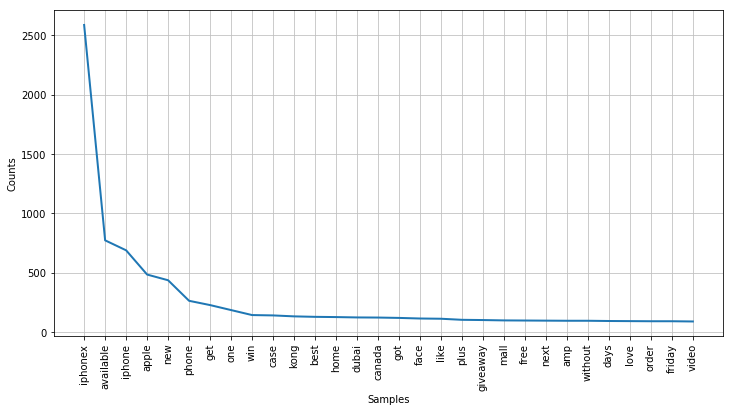

In [87]:
#Plot word frequency using tokens
#data visualization
import matplotlib.pyplot as plt
% matplotlib inline
plt.figure(figsize=(12,6))
fdist.plot(30)

In [88]:
#how many tweets contain geocode

geo = [T['user']['geo_enabled'] for T in tweets if 'user' in T]

c = Counter(geo)
print c

Counter({False: 15550, True: 9434})


### Word Cloud

In [89]:
fdist

FreqDist({'quebec': 1,
          'gestes': 1,
          'todays': 1,
          'yellow': 6,
          'four': 1,
          'hanging': 3,
          'thursfri': 1,
          'andro': 1,
          'looking': 27,
          'eligible': 2,
          'aux': 1,
          'sorry': 2,
          'swarovskicrystals': 1,
          'onstage': 1,
          'aigooo': 1,
          'mobilesitedesign': 1,
          'updated': 15,
          'assembler': 2,
          'rogerswireless': 1,
          'sehun': 1,
          'activation': 4,
          'siapa': 1,
          'hdtv': 1,
          'paikallisessa': 1,
          'lujoso': 1,
          'updates': 6,
          'bringing': 6,
          'courageous': 1,
          'lanuve': 2,
          'cnet': 3,
          'mextures': 1,
          'prize': 2,
          'solution': 1,
          'greaaaat': 1,
          'sundayfare': 1,
          'kunci': 1,
          'elissa': 1,
          'ups': 2,
          'chloroplast': 1,
          'ente': 1,
          'tired': 4,
   

In [90]:
#Sets up data to make Excel-like table
auto_word = []

#Splits values into each column; c1 word, c2 frequency.
for k,v in fdist.items():
    auto_word.append([k,v])

#make it look like an Excel worksheet and rewords column headers, then prints result.
autotestlist = pd.DataFrame(auto_word)
autotestlist = autotestlist.rename(columns={0: 'word', 1: 'frequency'})
autotestlist

,word,frequency
0,yellow,6
1,four,1
2,hanging,3
3,increase,2
4,eligible,2
5,slavelabour,1
6,aigooo,1
7,navigating,1
8,sehun,1
9,hdtv,1


In [91]:
word_list = autotestlist.ix[:, 0].tolist()
word_text = ' '.join(map(str, word_list))
word_text

/Users/achauncey/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


'yellow four hanging increase eligible slavelabour aigooo navigating sehun hdtv paikallisessa lujoso bringing lanuve mextures prize greaaaat kunci chloroplast tired tires elegant second tether bolts rivalits fingers designing polako ooredoo chine reported china easternmarket bestever kids reports military hornsby justwow targetcorporation replace brought dna spoke laughters catchy music ltima strike relax brings yahoo glass hold locked onstage saturdaynight chapelfield currency bluecube want organizer absolute hoe complaining travel hom feature machine hough hot hop gaming beauty auntysays wrong giveawayends kuching wins wink keeps wind wine tytyy telecom mabes activating fit fix pilkington distinguishing hidden easier foxconnoficial birthdaychristmas effects silver beratur bebe addicted xread financial series allah solution mdz message trending kaseoriginal gradation smh foundation hillaryclinton leopard tahun sheet estimate ate birdie shelves shipped musicians germanytrip emquartier 

In [92]:
import Image
#Importing Modules for Word Cloud
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud, STOPWORDS

#directory
d = path.dirname("data/")

# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask_phone = np.array(Image.open(path.join(d, "phone-stencil.png")))

(-0.5, 999.5, 999.5, -0.5)

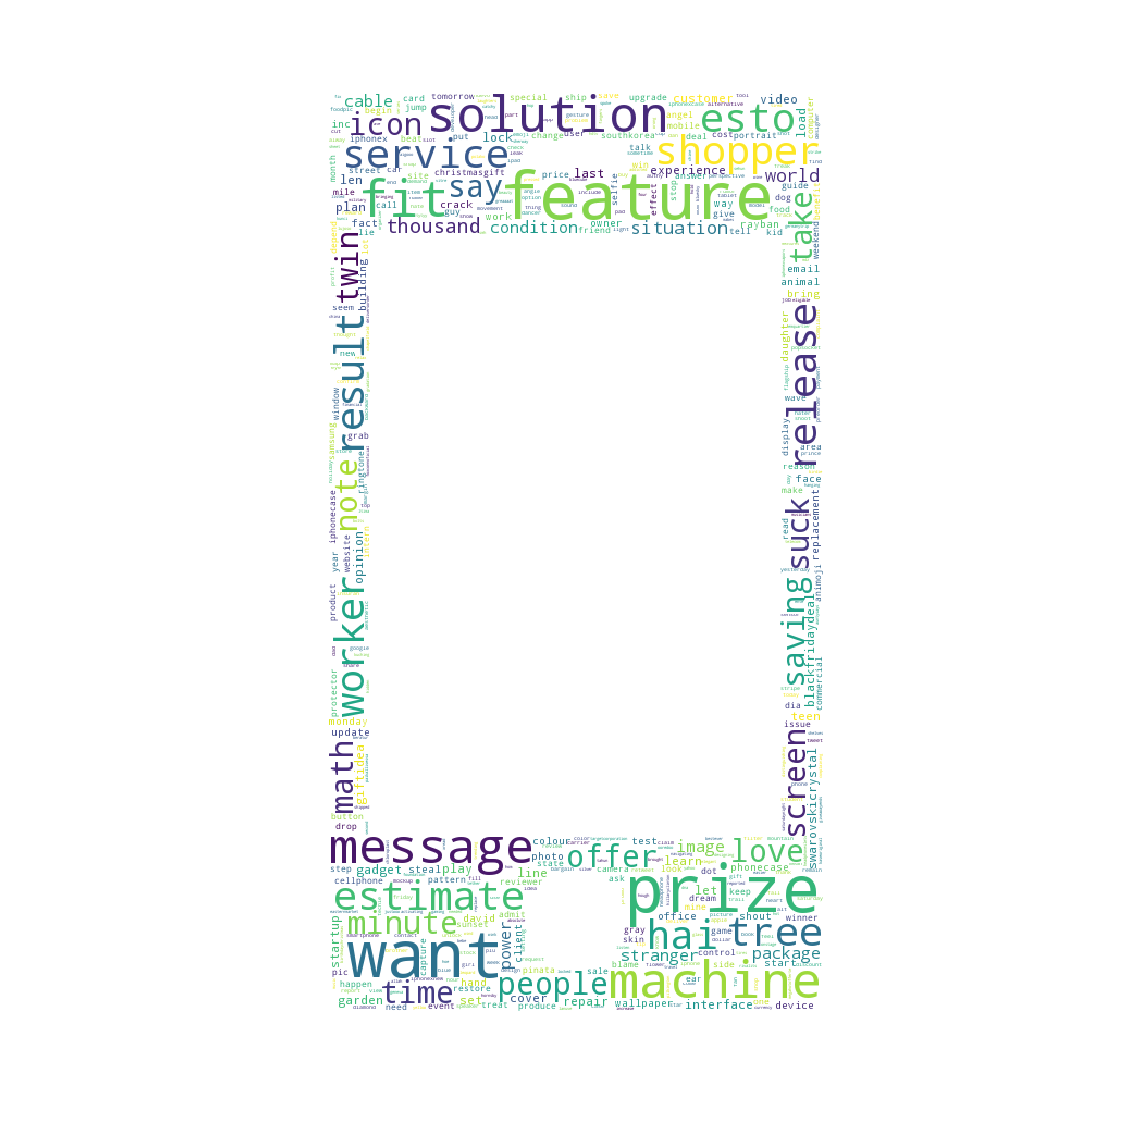

In [93]:
stopwords = set(STOPWORDS)

wc = WordCloud(background_color="white", max_words=2000, mask=mask_phone,
               stopwords=stopwords)
# generate word cloud
wc.generate(word_text)

# show
plt.figure(figsize=(20,20))
plt.imshow(wc)
plt.axis("off")

## Co-Hashtag Network

In [15]:
#Construct like a Bigrams network

In [16]:
#Create the dataframe
#Converts back to dataframe
pairs_frame = english_df[['text']]
#Remove stopwords
new_frame = pairs_frame.text.str.extractall('(#\w+)').groupby(level=0)[0].apply(' '.join)
new_frame

7                                     #iPhoneX #AppleEvent
12                                  #WhatThePrice #iPhoneX
13                                                #iPhoneX
14                                                #iPhoneX
15       #animojikaraoke #iphonex #queen #bohemianrapso...
16       #weddingcakerock #royalnationalpark #sydney #i...
17                                                #IphoneX
20                    #WIN #GIVEAWAY #COMPETITION #iPhoneX
23       #FREE #GIVEAWAY #Contest #WIN #iPhoneX #iPhone...
25                                                #iphonex
27                            #crypto #blockchain #iPhoneX
31                          #Thanksgiving #turkey #iphonex
32                                  #WhatThePrice #iPhoneX
35                                    #iphoneX #uae #dubai
45                                                #iPhoneX
49                                #NewProfilePic #nofilter
51                                         #Apple #iPhon

In [17]:
#construct the list for bigrams
pairs_text = new_frame
pairs_list = pairs_text.values.tolist()
pairs_list = pd.DataFrame(pairs_list, columns=['text'])
#pairs_list

#lowercase all values
#Sets back the # symbol in front of hashtags lowered.
pairs_list['text'] = pairs_list['text'].str.lower()
pairs_list['text'] = pairs_list['text'].astype(str)
#pairs_list

#converts back into list
bigrams_list = pairs_list.values.tolist()
bigrams_list

#flattens list for bigrams
concat_list = [j for i in bigrams_list for j in i]
concat_list

['#iphonex #appleevent',
 '#whattheprice #iphonex',
 '#iphonex',
 '#iphonex',
 '#animojikaraoke #iphonex #queen #bohemianrapsody #carriedaway',
 '#weddingcakerock #royalnationalpark #sydney #ilovesydney #australia #visitnsw #iphonex #iphonephotog',
 '#iphonex',
 '#win #giveaway #competition #iphonex',
 '#free #giveaway #contest #win #iphonex #iphone8 #follow #retweet',
 '#iphonex',
 '#crypto #blockchain #iphonex',
 '#thanksgiving #turkey #iphonex',
 '#whattheprice #iphonex',
 '#iphonex #uae #dubai',
 '#iphonex',
 '#newprofilepic #nofilter',
 '#apple #iphonex',
 '#blackfriday #cybermonday #sale #pig #cat #paws #iphonex #iphone8 #iphone8plus #iphone7',
 '#photos #iphone #ipad #iphonex',
 '#iphonex',
 '#iphonex',
 '#shotoniphone #iphonex #beachdays #sunrays',
 '#iphonex #iphonex #iphonex',
 '#thanksgiving2017 #cambpics #iphonex #thankful',
 '#newprofilepic #nofilter',
 '#iphonex #canada',
 '#faceid',
 '#iphonex',
 '#iphone8plus',
 '#iphonex',
 '#win #giveaway #competition #iphonex',
 '#wi

In [18]:
#Creating the bigrams
bigrams = [b for l in concat_list for b in zip(l.split(" ")[:-1], l.split(" ")[1:])]
bigrams

[('#iphonex', '#appleevent'),
 ('#whattheprice', '#iphonex'),
 ('#animojikaraoke', '#iphonex'),
 ('#iphonex', '#queen'),
 ('#queen', '#bohemianrapsody'),
 ('#bohemianrapsody', '#carriedaway'),
 ('#weddingcakerock', '#royalnationalpark'),
 ('#royalnationalpark', '#sydney'),
 ('#sydney', '#ilovesydney'),
 ('#ilovesydney', '#australia'),
 ('#australia', '#visitnsw'),
 ('#visitnsw', '#iphonex'),
 ('#iphonex', '#iphonephotog'),
 ('#win', '#giveaway'),
 ('#giveaway', '#competition'),
 ('#competition', '#iphonex'),
 ('#free', '#giveaway'),
 ('#giveaway', '#contest'),
 ('#contest', '#win'),
 ('#win', '#iphonex'),
 ('#iphonex', '#iphone8'),
 ('#iphone8', '#follow'),
 ('#follow', '#retweet'),
 ('#crypto', '#blockchain'),
 ('#blockchain', '#iphonex'),
 ('#thanksgiving', '#turkey'),
 ('#turkey', '#iphonex'),
 ('#whattheprice', '#iphonex'),
 ('#iphonex', '#uae'),
 ('#uae', '#dubai'),
 ('#newprofilepic', '#nofilter'),
 ('#apple', '#iphonex'),
 ('#blackfriday', '#cybermonday'),
 ('#cybermonday', '#sa

In [20]:
#Put Bigrams back into dataframe
biframe = pd.DataFrame(bigrams, columns=['Grams','Grams2'])
biframe['Grams'] = biframe['Grams'].replace({'#':''}, regex=True)
biframe['Grams2'] = biframe['Grams2'].replace({'#':''}, regex=True)
biframe

,Grams,Grams2
0,iphonex,appleevent
1,whattheprice,iphonex
2,animojikaraoke,iphonex
3,iphonex,queen
4,queen,bohemianrapsody
5,bohemianrapsody,carriedaway
6,weddingcakerock,royalnationalpark
7,royalnationalpark,sydney
8,sydney,ilovesydney
9,ilovesydney,australia


In [21]:
#Put dataframe into csv file
biframe.to_csv('data/bigram_network.csv')

In [23]:
#Bigram frequency
import re
from collections import Counter
from itertools import islice, izip

bi = Counter(bigrams)
bi.most_common(10)

[(('#win', '#iphonex'), 491),
 (('#iphonex', '#iphone8'), 490),
 (('#giveaway', '#competition'), 465),
 (('#win', '#giveaway'), 456),
 (('#competition', '#iphonex'), 453),
 (('#newprofilepic', '#nofilter'), 432),
 (('#iphone8', '#giveaway'), 377),
 (('#giveaway', '#phone'), 371),
 (('#whattheprice', '#iphonex'), 269),
 (('#apple', '#iphonex'), 194)]

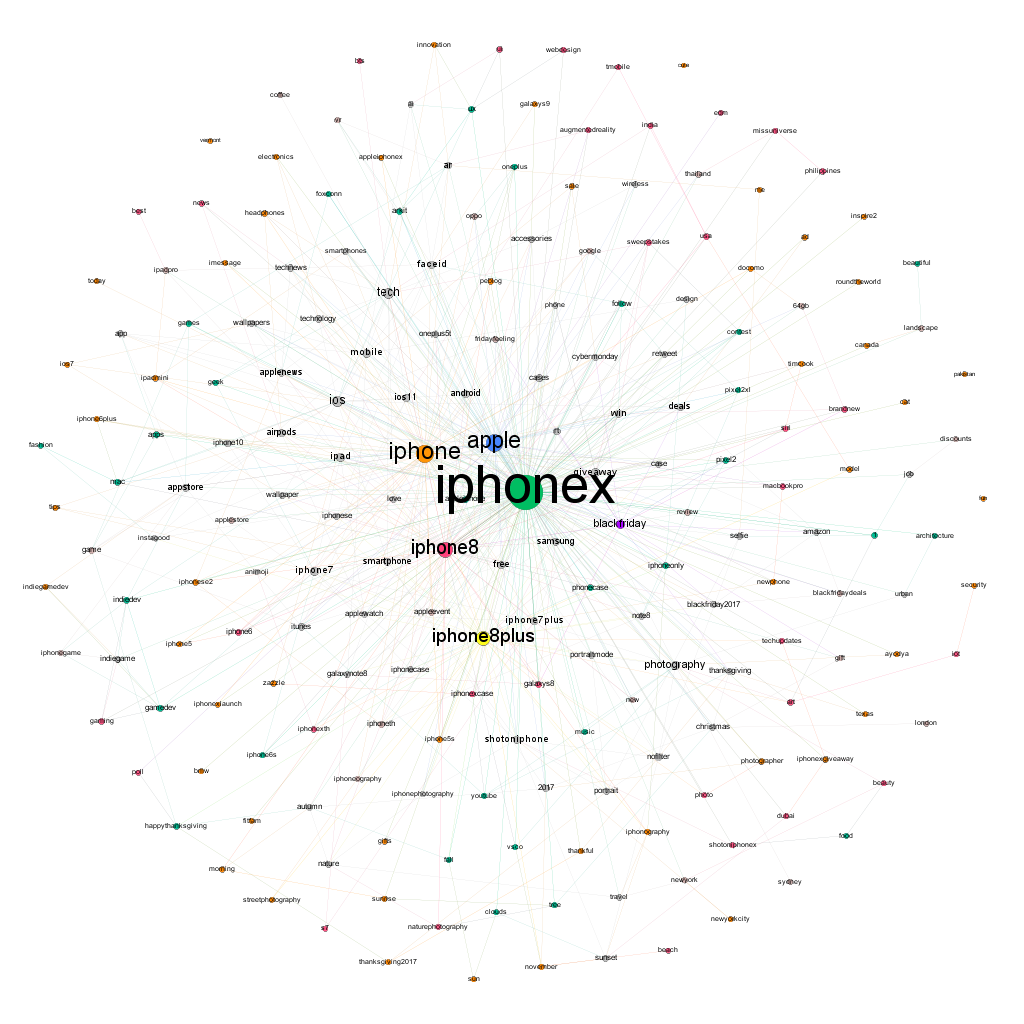

In [29]:
#Display image from network analytics here.
from IPython.display import Image
Image(filename='data/cohashtag.png') 
#Uses the Fruchterman Reingold layout method
#Nodes with a Degree < 5 are not shown in the image (occur too little!)

## Final Analysis

We ran a collection of Python code to break down Twitter data related to iPhones (25000 Tweets) and performed analytics to solve our problems above.

In terms of positive results, the iphone types--as well as FaceID and TouchID--are rated above neutral by the general audience. TouchID's average sentiment is rated significantly more positive than FaceID's sentiment--by a factor of 10 in some tests. The sentiment recorded among iPhone types are closer with the following rank below:

1. iPhone 8 Plus

2. iPhone 8

3. iPhone X

It appears the Plus edition is rated higher than both the iPhone X and iPhone 8. The primary difference between the Plus and the 8 is the size of the phone and the screen, while iPhone X and iPhone 8 Plus differ in screen size, pricing (X > 8P), and features provided.

**Topic Modeling**

Using topic modeling, we discovered a few topics related to each kind of phone as well as TouchID and FaceID. Through this modeling, we can determine potential ideas as well as the main compliment--or critique--of a phone and categorize the tweets.

For iPhone 8, it looks like it was selected recently and rated positively due to deals during black friday, as well as being the "best" phone by certain consumers due to its template.

iPhone 8 Plus gets reviews specifically targeted towards it being a "cool" model, as well as mentions of its case, phone plan, battery life, and camera. There's a mention of battery life--an item we were looking into here, so perhaps an improvement on battery in the iPhone 8 is possible.

iPhone X got reviews on the FaceID feature, as well as the camera and the apple watch program associated with iPhone X users.

FaceID appears to have users making notes on its ability to recognize the user; taking this in tandem with the sentiment review score on FaceID, it's likely this feature still needs improvement.

TouchID appears to have users focusing on a select issue: the "button" associated with TouchID. They appear to be missing it, not able to get the button pressing sequence correct, and/or related issues with the interface design on the software.

**Network Analysis**

We generated a Word Cloud as well as a CoHashtag Network from the tweets as well.

The word cloud shows that select words such as prize, feature, solution, and fit are popular words associated with the iPhone; prize and solution having positive connotations for the product.

The cohashtag network shows that hashtags are predominantly accompanied with the type of phone, as well as a feature such as FaceID, an accessory such as headphones, a holiday such as Black Friday, or even another program or miscellaneous scene such as YouTube and Sunset. These results were pulled after getting rid of all hashtag pairs with less than five occurrences in the tweets.

The majority associations with the iPhones look to be related to technical items, such as the OS or a direct feature on the Apple products, or something that can be done with the phone, such as photography.

**Conclusion**

The FaceID feature needs the most work out of all the features. Battery life is a potential issue with the iPhone 8 Plus, but may extend out to future phones as well. The iPhone X occurs far more often than the iPhone 8 and iPhone 8 Plus, yet the iPhone 8 Plus still has a more positive review among users currently.

## References

https://stackoverflow.com/questions/21104592/json-to-pandas-dataframe

https://textblob.readthedocs.io/en/dev/

https://stackoverflow.com/questions/14278664/merging-sublists-in-python